In [4]:
# import standard libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import itertools

from sklearn.datasets import load_iris
from sklearn import tree, preprocessing
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from shutil import copyfile
from imblearn.under_sampling import ClusterCentroids
# load train data
train_data = pd.read_csv('../data/MoreManipulatedData_bucket_last_col.csv',usecols=lambda x: 'PLAYER_URL' not in x)

# different classes
train_data.BUCKET.unique()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, axes = plt.subplots(1, 1)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# convert string values to numerical data
def convert(data):
    number = preprocessing.LabelEncoder()
    data['POS'] = number.fit_transform(data.POS)
    data['LEAGUE'] = number.fit_transform(data.LEAGUE)
    data['FIRST_JUNIOR_YEAR'] = number.fit_transform(data.FIRST_JUNIOR_YEAR)
    data['DOB'] = number.fit_transform(data.DOB)
    data['NATIONALITY'] = number.fit_transform(data.NATIONALITY)
    data['SHOOTS'] = number.fit_transform(data.SHOOTS)
    data=data.fillna(-999)
    return data

# convert string values in data to numerical classes
train_data = convert(train_data)
X = np.asarray(train_data[train_data.columns[:-1]])
y = np.asarray(train_data.BUCKET)

cc = ClusterCentroids(random_state=0, sampling_strategy='majority')
X_resampled, y_resampled = cc.fit_resample(X, y)

# Separating the data and the labels


# Splitting the data into the train and the test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

train_index, test_index = next(sss.split(X_resampled, y_resampled))
X_train, X_test = X_resampled[train_index], X_resampled[test_index]
y_train, y_test = y_resampled[train_index], y_resampled[test_index]

# print('Training data: \n',X)
# print('\n')
# print('Training labels: \n',y_train)

In [7]:
K = 10
# ks = []
# f1_macro_d = []
# f1_macro_u = []
# while K < 100:

# print(K)

# K Nearest Neighbors Classifier (has to be able to deal with floats)
KNN = KNeighborsClassifier(K,weights='distance')
# fit the classifier using the training data
KNN = KNN.fit(X_train, y_train)
# Predict the test class labels using the trained KNN classifier 
y_pred = KNN.predict(X_test)
f1_macro = f1_score(y_test, y_pred,average='macro')
print('Macro accuracy with uniform weights is %s' % f1_macro)


Macro accuracy with uniform weights is 0.5654681975886138


Confusion matrix, without normalization
[[355  29  16   8]
 [ 97  30  29   0]
 [ 39  20  68   0]
 [ 55   0   0  72]]


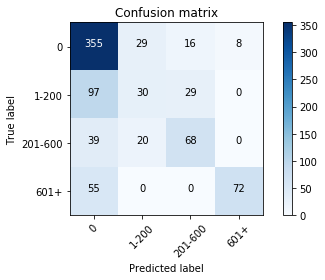

In [8]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm,['0','1-200','201-600','601+'])

# print accuracy of the classifier
# 

# fig, axes = plt.subplots(1, 1)

# axes.plot(ks,f1_macro_d)
# axes.plot(ks,f1_macro_u)

# labels = ["Uniform Weighting","Distance Weighting"]
# axes.legend(axes.get_lines(), labels, loc=1)
# plt.ylabel('Accuracy')
# plt.xlabel('Value of K')
# plt.title('Effect of K on accuracy')
# plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    1-200          0.65      0.87      0.74       408
    201-600        0.38      0.19      0.26       156
    601+           0.60      0.54      0.57       127
           0       0.90      0.57      0.70       127

    accuracy                           0.64       818
   macro avg       0.63      0.54      0.57       818
weighted avg       0.63      0.64      0.62       818

